In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline



In [41]:
x = np.arange(25)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

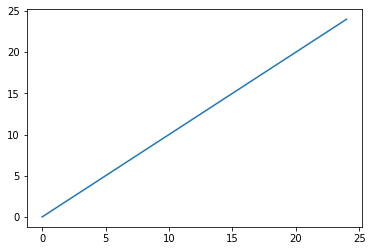

In [44]:
plt.plot(x)

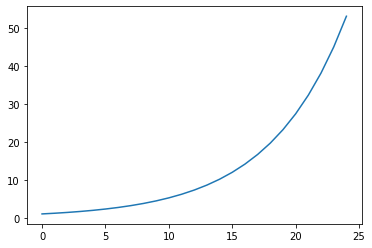

In [48]:
plt.plot(x, 1*np.power(1.18, x ))

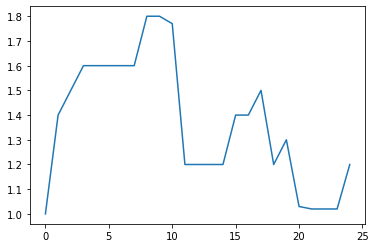

In [71]:
gr = np.array([1, 1.4, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.8, 1.8, 1.77, 1.2, 1.2, 1.2, 1.2, 1.4, 1.4, 1.5, 1.2, 1.3, 1.03, 1.02, 1.02, 1.02, 1.2])
plt.plot(x, 1*gr)

In [94]:

def apply_growth_rates(start_value, growth_rates):
    growth_applied = np.zeros(len(growth_rates))
    growth_applied[0] = start_value;
    for i in range(len(gr)-1):
        growth_applied[i+1] = growth_applied[i]*growth_rates[i+1]
    return growth_applied




### Movig average implementation

```mov_avg``` is my custom implementation of moving average and its used to smooth-out values by averaging them over neighbouring values. ```seq``` parameter tells the function which values to take into account calculating the avg

```apply_window_to_index``` is used to pad sequence for edge cases (like ```index=0``` etc)

In [97]:
def apply_window_to_index(index, size,  seq):
    if (index + seq[0]) < 0:
        return seq + (index - seq[0])
    seq_last = seq[len(seq)-1]
    if (index + seq_last) > size-1:
        return seq + (size - 1 - (index + seq_last))
    return seq
    
def mov_avg(values, avg_seq)


To better understand ```apply_window_to_index```  here are some examples

In [103]:
 
print(apply_window_to_index(18, 20, np.array([-2,-1,0,1,2])))
print(apply_window_to_index(0, 20, np.array([-2,-1,0,1,2])))
print(apply_window_to_index(5, 20, np.array([-2,-1,0,1,2])))

[-3 -2 -1  0  1]
[0 1 2 3 4]
[-2 -1  0  1  2]


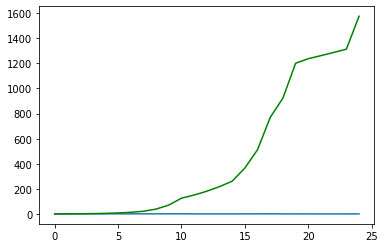

In [100]:
plt.plot(x, gr)    
plt.plot(x, apply_growth_rates(1, gr), 'g')
plt.show()

In [79]:
ex1 = np.array([-2,-1,0,1,2])

In [81]:
ex1+5

array([3, 4, 5, 6, 7])

# def moving_avg(values, avg_seq):
#     first_index = avg[0]
#     if first_index < 0:
#     m_avg = np.zeros(len(values))
#     for i in 